In [1]:
## Importing packages and modules

import pandas as pd
import os
import matplotlib.pyplot as plt

#data
test_data = os.path.join('data', 'BRCA_minimal_60x19.gct')
large_data = os.path.join('data', 'BRCA_large_20783x40.gct')

## Question 1
Write a Python function with the following functional spec:
Inputs:
- a GenePattern GCT file
- An optional summary parameter, boolean. 
Output: a Pandas DataFrame containing the contents of the input file



In [2]:
def read_gct(GCT_file, summary = False):
    """
    Reads a GCT data file and outputs a Pandas dataframe.
    
    GCT_file(string) --> filepath to GCT dataset
    summary(boolean) --> if true, print rows and columns of GCT file
    
    returns a Pandas dataframe
    """
    data = pd.read_csv(GCT_file, delimiter = "\t")
    if summary == True:
        print("Data has: %d rows and %d columns"%(len(data), len(data.loc[0])))
    return data

## Question 2a
Use the function you wrote in #1 to read this file and print the summary: https://datasets.genepattern.org/data/test_data/BRCA_minimal_60x19.gct


In [17]:
small_data = read_gct(test_data, True)

Data has: 60 rows and 21 columns


## Question 2b
Use that same function to read this file (without setting a value of the parameter summary in your function call): https://datasets.genepattern.org/data/test_data/BRCA_large_20783x40.gct


In [4]:
big_data = read_gct(large_data)

## Question 3
Using the data in the DataFrame from #2b, plot a histogram for each of the following columns. You can use the matplotlib package or any other plotting package you are familiar with.
- A7-A0DB-normal
- A7-A13E-normal
- BH-A0B3-primary
- BH-A0B5-primary


<AxesSubplot:title={'center':'A7-A0DB-normal'}, ylabel='Frequency'>

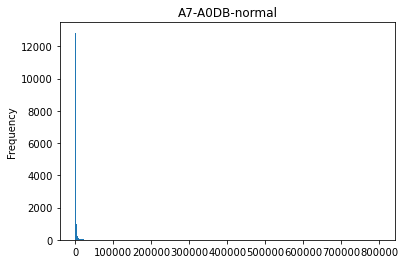

In [5]:
cols = "A7-A0DB-normal,A7-A13E-normal,BH-A0B3-primary,BH-A0B5-primary".split(",")
subset = big_data[cols]
big_data[cols[0]].plot.hist(bins = 1000, title = cols[0])

<AxesSubplot:title={'center':'A7-A13E-normal'}, ylabel='Frequency'>

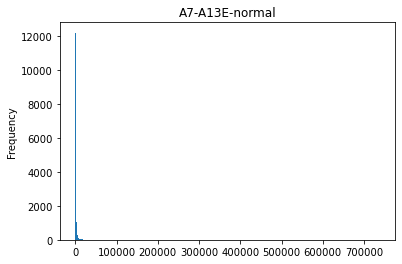

In [6]:
big_data[cols[1]].plot.hist(bins = 1000, title = cols[1])

<AxesSubplot:title={'center':'BH-A0B3-primary'}, ylabel='Frequency'>

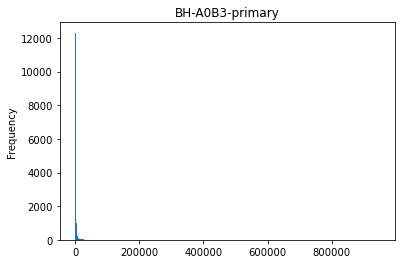

In [7]:
big_data[cols[2]].plot.hist(bins = 1000, title = cols[2])

<AxesSubplot:title={'center':'BH-A0B5-primary'}, ylabel='Frequency'>

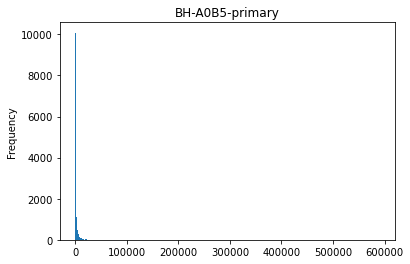

In [8]:
big_data[cols[3]].plot.hist(bins = 1000, title = cols[3])

## Question 4
Using the data in the DataFrame from #2b, print out a DataFrame containing one row for each sample, with the following columns computed:
- Sample name
- Mean
- Median
- Standard deviation



In [9]:
def stats(x):
    """
    obtains descriptive statistics of a row of genetic data 
    """
    return([x.mean(), x.median(), x.std()])

def get_stats(big_data):
    """gets some descriptive statistics of dataset"""
    subset = big_data[big_data.columns[2:]]
    out = pd.DataFrame(subset.apply(stats, axis = 1).tolist(),
            columns = ["Mean","Median", "Standard_Deviation"])
    out["Name"] = big_data["Name"]
    out = out[["Name", "Mean","Median", "Standard_Deviation"]]
    return out
get_stats(big_data)



,Name,Mean,Median,Standard_Deviation
0,TSPAN6,3703.475,3658.5,1817.633894
1,TNMD,489.750,106.5,791.742892
2,DPM1,1990.775,1829.5,959.396939
3,SCYL3,1822.000,1593.0,960.226549
4,C1orf112,628.875,411.0,516.195411
...,...,...,...,...
20778,HCP5B,23.400,20.0,18.036715
20779,SPRY4-IT1,25.000,20.0,17.038418
20780,AC018638.8,67.950,60.5,42.092663
20781,LINC02246,33.100,20.0,28.370082


## Question 5a
Using the data in the DataFrame from #2b, filter out (remove) the 10% most variable rows based on their standard deviations (e.g., if the DataFrame had 100 rows, you would remove the 10 rows with the highest standard deviation).

In [10]:
def custom_filter(stats_df, data_df):
    """
    a custom filter that filters out 10% most variable rows based on standard deviations
    
    stats_df --> dataframe with descriptive statistics of each row 
    data_df --> original data
    returs filtered data
    """
    # get top 10% of standard deviation
    std = stats_df["Standard_Deviation"].tolist()
    ten = len(std)//10 * 9 
    top_ten = sorted(std)[ten:]
    
    return data_df[~stats_df["Standard_Deviation"].isin(top_ten)].reset_index(drop = True)

## Question 5b
What are the mean and median of each column after applying this filter? Plot the histograms of the same 4 columns from question #3.

In [11]:
# mean and median of each column
filtered_stats = get_stats(custom_filter(get_stats(big_data), big_data))
filtered_data = custom_filter(get_stats(big_data), big_data)

<AxesSubplot:title={'center':'A7-A0DB-normal'}, ylabel='Frequency'>

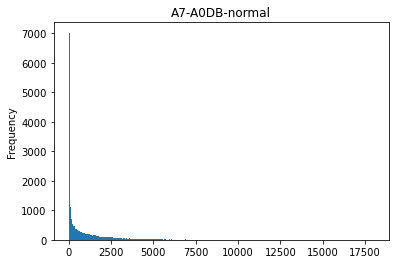

In [18]:
filtered_data[cols[0]].plot.hist(bins = 300, title = cols[0])

<AxesSubplot:title={'center':'A7-A13E-normal'}, ylabel='Frequency'>

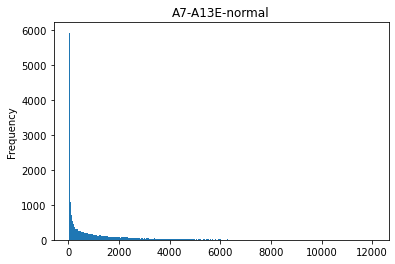

In [19]:
filtered_data[cols[1]].plot.hist(bins = 300, title = cols[1])

<AxesSubplot:title={'center':'BH-A0B3-primary'}, ylabel='Frequency'>

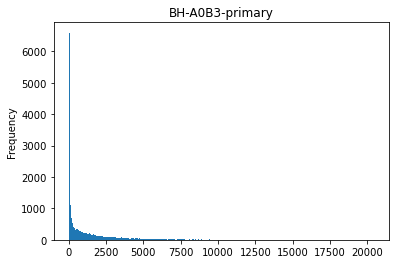

In [20]:
filtered_data[cols[2]].plot.hist(bins = 300, title = cols[2])

<AxesSubplot:title={'center':'BH-A0B5-primary'}, ylabel='Frequency'>

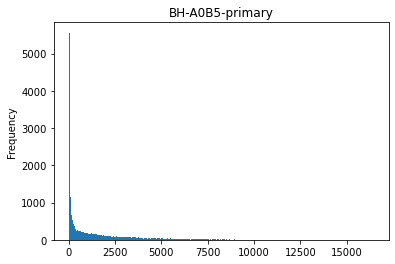

In [21]:
filtered_data[cols[3]].plot.hist(bins = 300, title = cols[3])